## INSTALLATION STEPS:
* IMPACT-T
    - clone: https://github.com/impact-lbl/IMPACT-T.git
    - then build:
    ```bash
    // inside the IMPACT-T src/ directory:
    cmake -S . -B build
    cmake --build build
    // the executable in now in build/bin/

    // this command needs sudo if you install into system paths:
    cmake --build build --target install
    ```
* lume-impact
    - Install distgen first. lume-impact depends on distgen, make sure you have the correct one: https://github.com/ColwynGulliford/distgen.git
    - Install lume impact: https://github.com/ChristopherMayes/lume-impact.git (some other dependencies might be needed, but should be more straight forward than distgen)

In [1]:
from impact import Impact
import matplotlib.pyplot as plt
import numpy as np
# from distgen import Generator

### generating particle distribution is optional

In [2]:
# G = Generator("distgen.yaml")
# G['n_particle'] = 5000
# G.run()

In [3]:
def run_impact(fpath):
    I = Impact(
        fpath,
        # initial_particles=G.particles,
        verbose=True,
    )
    I.numprocs = 1
    I.stop = 0.16
    I.run()
    return I

In [4]:
result = run_impact("ImpactT.in")
particles = result.particles['final_particles']

Configured to run in: /tmp/tmpb68niub6
Setting Npcol, Nprow = 1, 1
Removed element: stop_1
Set stop to s = 0.16
Running Impact-T in /tmp/tmpb68niub6
/usr/local/bin/ImpactTexe
 !-----------------------------------------------------------
 ! IMPACT-T Parallel Beam Dynamics Tracking Code: V2.2
 ! Copyright of The Regents of the University of California
 !-----------------------------------------------------------
 nblem:           28          28
 pass setting up lattice...
 check randomness:            0  0.30440529327431320     
 avgpts, jlow, and jhigh:        10000           1       10000
 sumx1,sumy1:    3.2565036338625238E-004   3.4235701058176931E-005
 pass generating initial distribution...
 tstop:   0.16000000000000000     
 i,t,<z>:            1  -3.2491412781226548E-012   0.0000000000000000     
 zmin,zmax:   -3.7885877563836535E-006  -4.7260878955274357E-008
 i,t,<z>:            2  -3.2328517694558257E-012  -1.9329268838307885E-006
 Ndata:          129, elapsed: 0.1847596168518

 time:    0.0000000000000000, elapsed: 83.07894587516785Finished.4272, elapsed: 83.058402299880987061855
Loaded fort 18 : Time and energy
Loaded fort 24 : RMS X information
Loaded fort 25 : RMS Y information
Loaded fort 26 : RMS Z information
Loaded fort 27 : Max amplitude information
Loaded fort 28 : Load balance and loss diagnostics
Loaded fort 29 : Cube root of third moments of the beam distribution
Loaded fort 30 : Fourth root of the fourth moments of the beam distribution
Loaded fort 60 : Slice information of the initial distribution
Loaded fort 70 : Slice information of the final distribution
Loading particles
Loaded fort 40 : initial particle distribution at t = 0
Loaded fort 50 : final particle distribution projected to the centroid location of the bunch
Converting z to t according to cathode_kinetic_energy_ref = 1.0 eV
Converted initial_particles to ParticleGroup
Converted final_particles to ParticleGroup


In [5]:
def plot_result(x, y):
    hist, edges = np.histogramdd([x, y], 100)
    plt.imshow(
        hist.T.tolist(),
        cmap='viridis',
    )

### HORIZONTAL

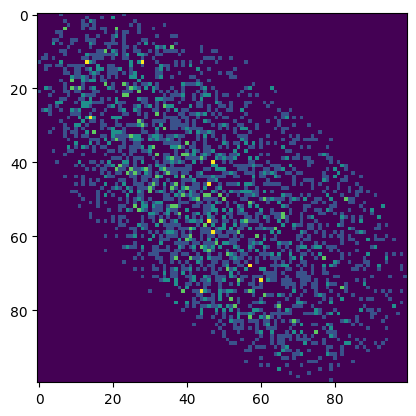

In [6]:
plot_result(particles.x, particles.px)

## VERTICAL

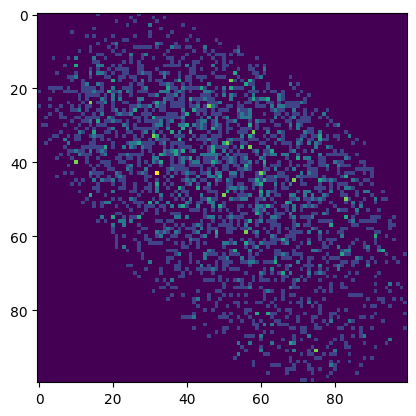

In [7]:
plot_result(particles.y, particles.py)

## CROSS SECTION

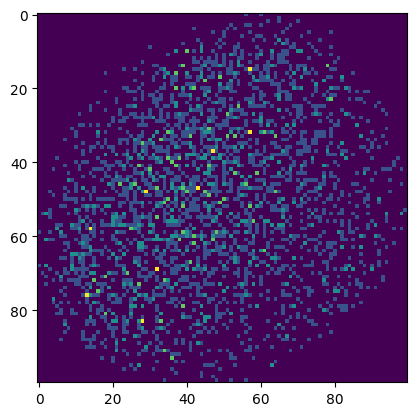

In [8]:
plot_result(particles.x, particles.y)

## LONGITUDINAL

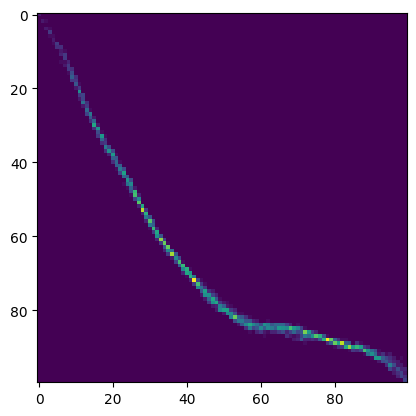

In [9]:
plot_result(particles.z, particles.pz)